In [289]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Input, Activation, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
#
from tensorflow.keras.layers import Dense, Input, Activation, Dropout
#
from tensorflow.keras.utils import plot_model
#
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

#
from tensorflow.keras. metrics import FalseNegatives, FalsePositives, TrueNegatives
from tensorflow.keras. metrics import TruePositives, Precision, Recall
#
from tensorflow.keras.optimizers import Adam





# Predicting the flower variety using classification

In [290]:
iris = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

## Data visualization and EDA (Exploratory Data Analysis)

In [291]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


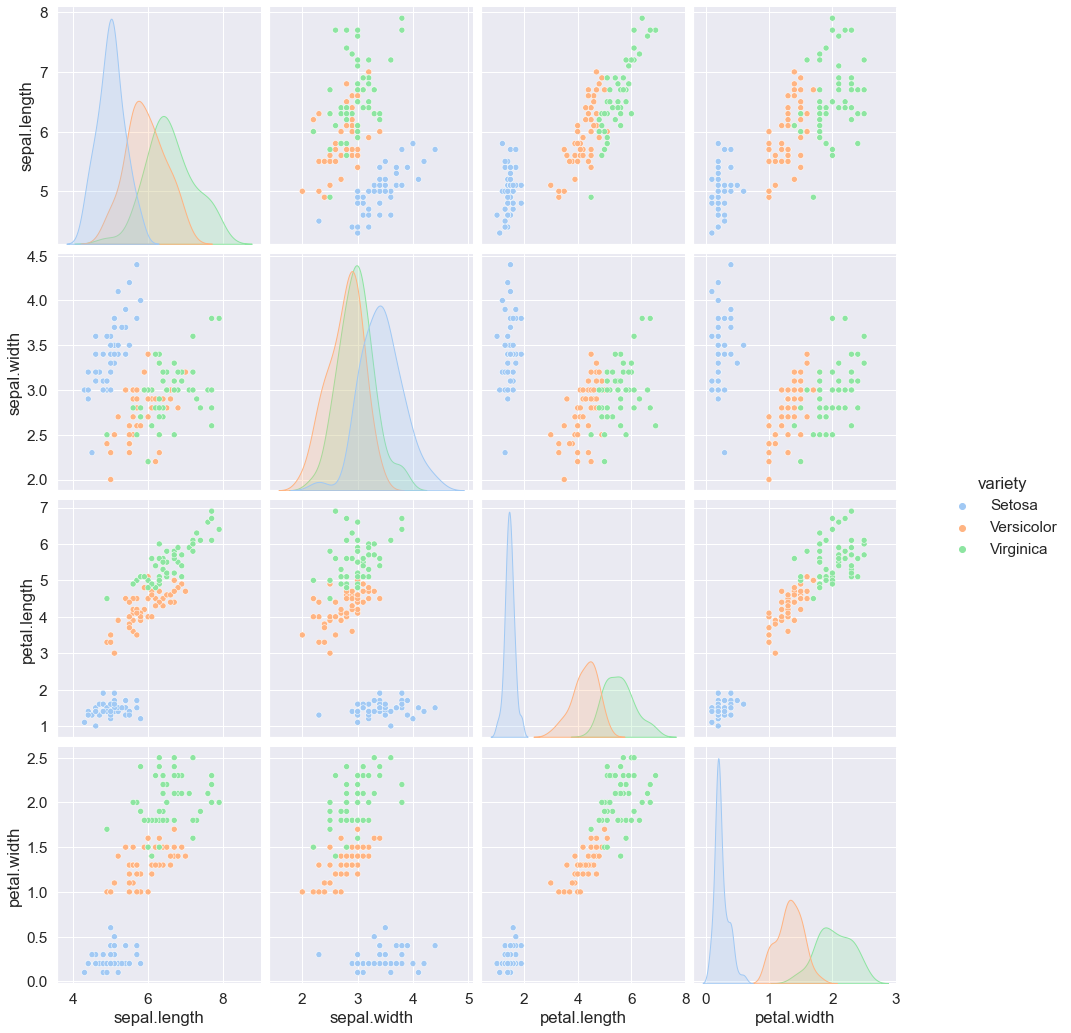

In [292]:
g=sns.pairplot(iris,hue='variety',palette = 'pastel')
g.fig.set_size_inches(15,15)

## Visual Conclusions
We can make a very well separation of the species using most of pairs of variables, except the following ones:
* Sepal's length and sepal's width

However, the specimen that can always be grouped and identified, no matter what kind of pairs of variables are used, is the Setosa variety.


In [293]:
#Transform Categorical variables to numerical variables.
iris_cat = pd.get_dummies(iris)
iris_cat

,sepal.length,sepal.width,petal.length,petal.width,variety_Setosa,variety_Versicolor,variety_Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [294]:
#Function for correlation matrix
def corr_matrix(dataframe):
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize = (10, 10))  
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(ax=ax,
                #mask=mask,
                data=corr, 
                annot=True,
                cmap="YlGnBu",
                robust=True,
               vmin=0,
               vmax=1)
    ax.set_title('Correlation Matrix', fontsize = 16)
    plt.show()

(array([ 4.,  1.,  6.,  5., 12.,  8.,  4.,  5.,  2.,  3.]),
 array([4.3 , 4.45, 4.6 , 4.75, 4.9 , 5.05, 5.2 , 5.35, 5.5 , 5.65, 5.8 ]),
 <BarContainer object of 10 artists>)

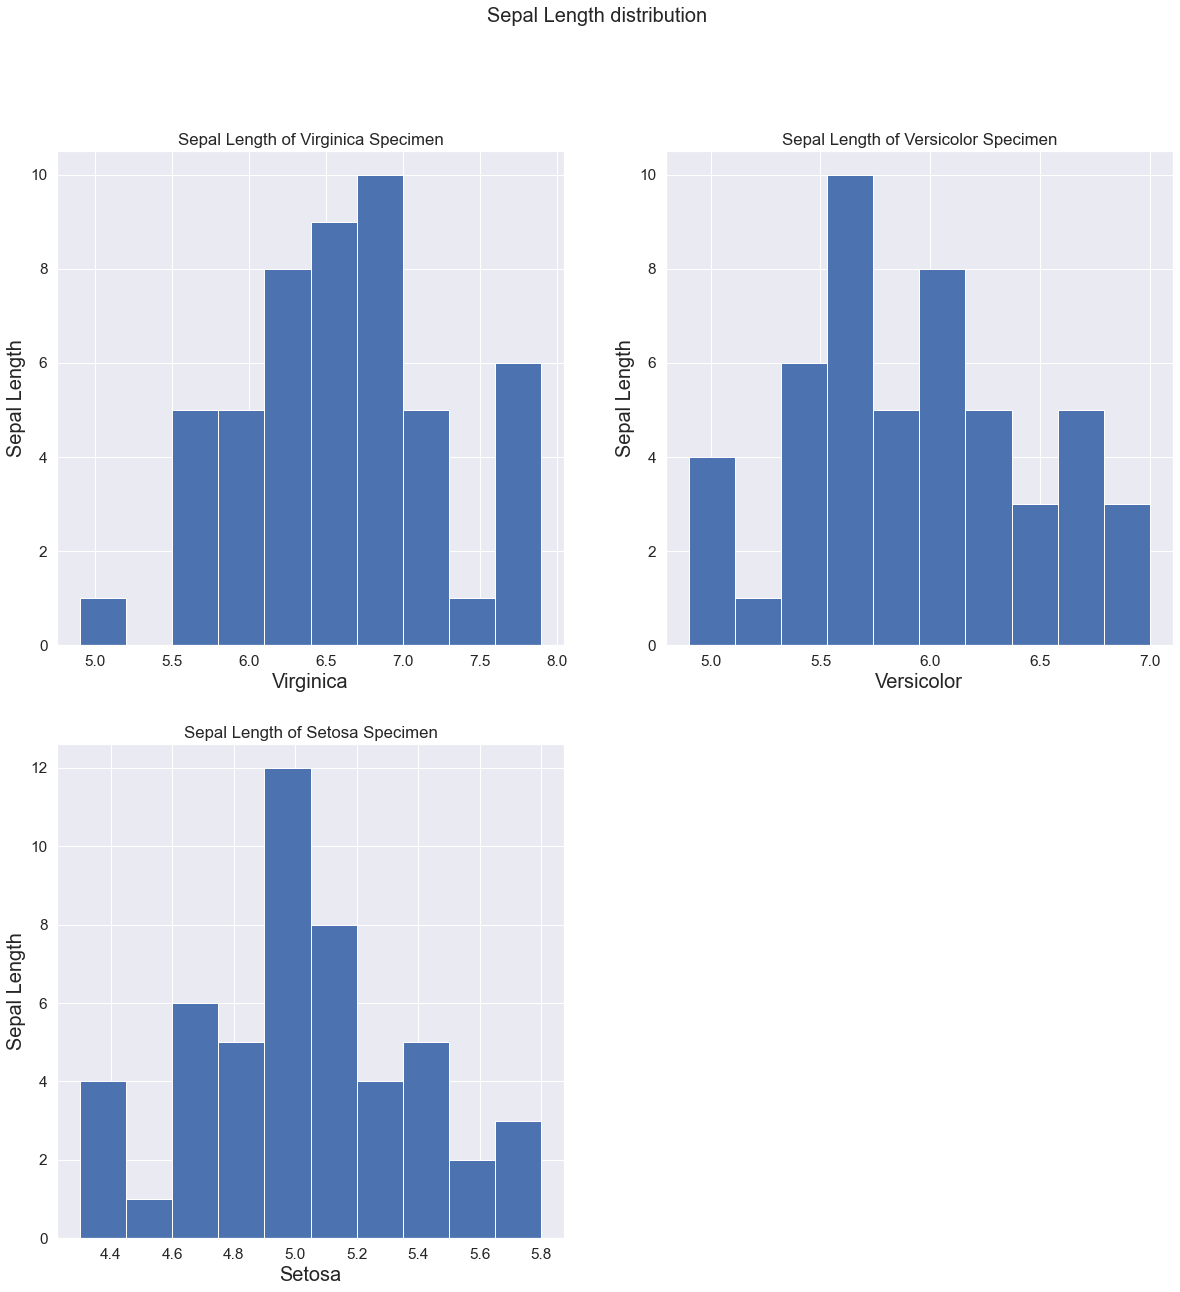

In [295]:
seplength_plot = plt.figure(figsize=(20,20))
#Posición de Gráficos
seplength_plot.suptitle("Sepal Length distribution", fontsize=20)
ax1 = seplength_plot.add_subplot(221)
ax2 = seplength_plot.add_subplot(222)
ax3 = seplength_plot.add_subplot(223)
#Titulos de Ejes
ax1.set_xlabel('Virginica', fontsize=20)
ax1.set_ylabel('Sepal Length', fontsize=20)
ax2.set_xlabel('Versicolor', fontsize=20)
ax2.set_ylabel('Sepal Length', fontsize=20)
ax3.set_xlabel('Setosa', fontsize=20)
ax3.set_ylabel('Sepal Length', fontsize=20)
#Titulos de gráficos
ax1.title.set_text('Sepal Length of Virginica Specimen')
ax2.title.set_text('Sepal Length of Versicolor Specimen')
ax3.title.set_text('Sepal Length of Setosa Specimen')
ax1.hist(iris[iris['variety']=='Virginica']['sepal.length'].values)
ax2.hist(iris[iris['variety']=='Versicolor']['sepal.length'].values)
ax3.hist(iris[iris['variety']=='Setosa']['sepal.length'].values)



(array([ 1.,  0.,  1., 10.,  7., 15.,  6.,  6.,  2.,  2.]),
 array([2.3 , 2.51, 2.72, 2.93, 3.14, 3.35, 3.56, 3.77, 3.98, 4.19, 4.4 ]),
 <BarContainer object of 10 artists>)

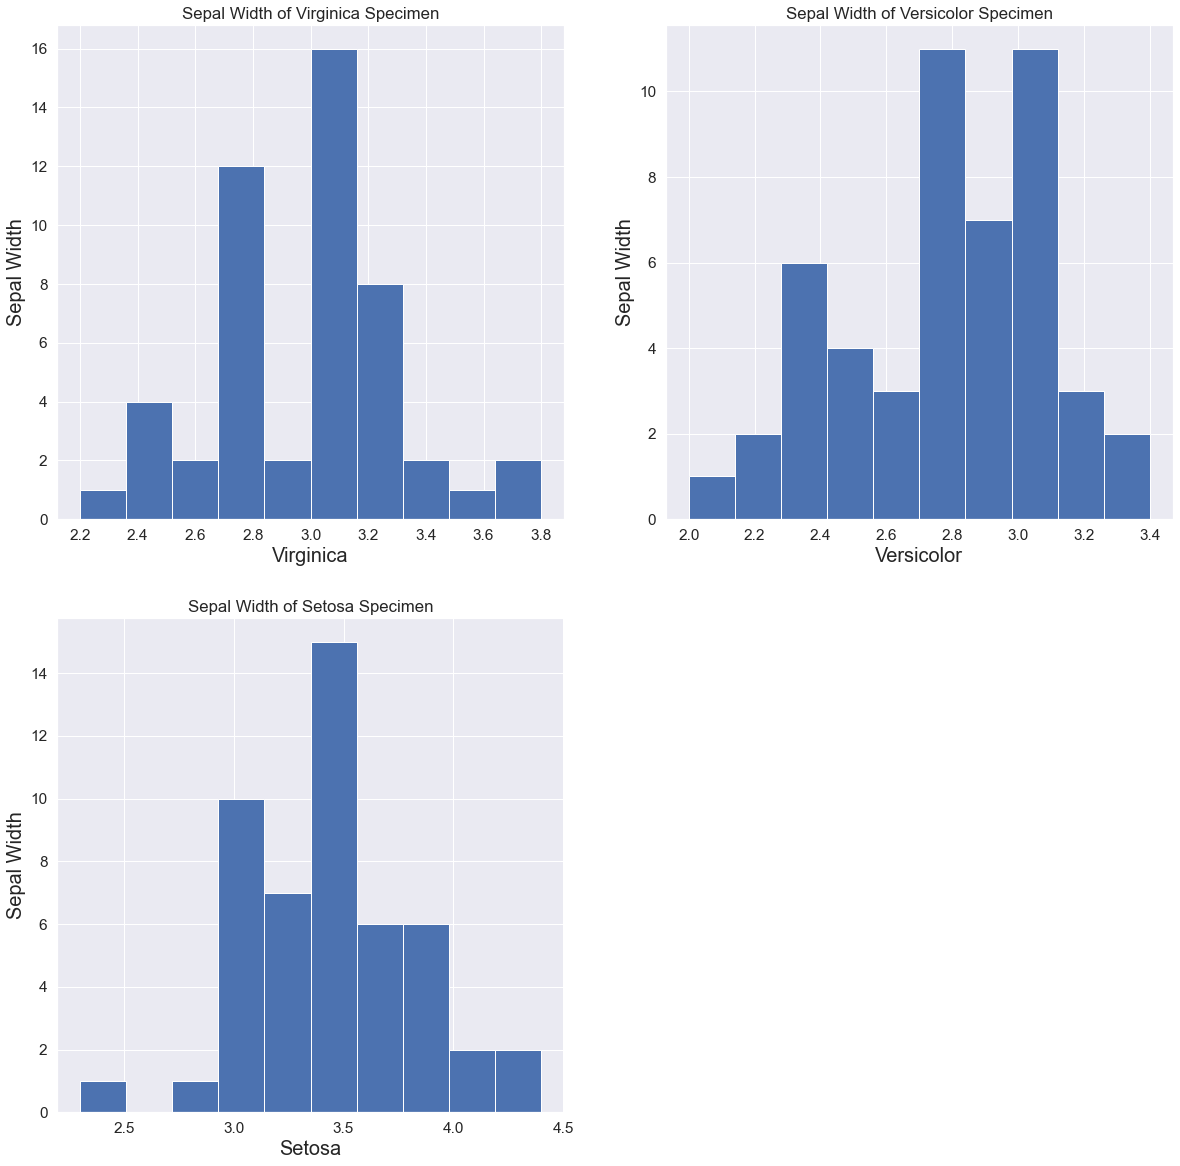

In [296]:
sepwidth_plot = plt.figure(figsize=(20,20))
#Posición de Gráficos
seplength_plot.suptitle("Sepal Width distribution", fontsize=20)
ax1 = sepwidth_plot.add_subplot(221)
ax2 = sepwidth_plot.add_subplot(222)
ax3 = sepwidth_plot.add_subplot(223)
#Titulos de Ejes
ax1.set_xlabel('Virginica', fontsize=20)
ax1.set_ylabel('Sepal Width', fontsize=20)
ax2.set_xlabel('Versicolor', fontsize=20)
ax2.set_ylabel('Sepal Width', fontsize=20)
ax3.set_xlabel('Setosa', fontsize=20)
ax3.set_ylabel('Sepal Width', fontsize=20)
#Titulos de gráficos
ax1.title.set_text('Sepal Width of Virginica Specimen')
ax2.title.set_text('Sepal Width of Versicolor Specimen')
ax3.title.set_text('Sepal Width of Setosa Specimen')
ax1.hist(iris[iris['variety']=='Virginica']['sepal.width'].values)
ax2.hist(iris[iris['variety']=='Versicolor']['sepal.width'].values)
ax3.hist(iris[iris['variety']=='Setosa']['sepal.width'].values)




(array([ 5.,  0., 29.,  7.,  0.,  0.,  7.,  0.,  1.,  1.]),
 array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ]),
 <BarContainer object of 10 artists>)

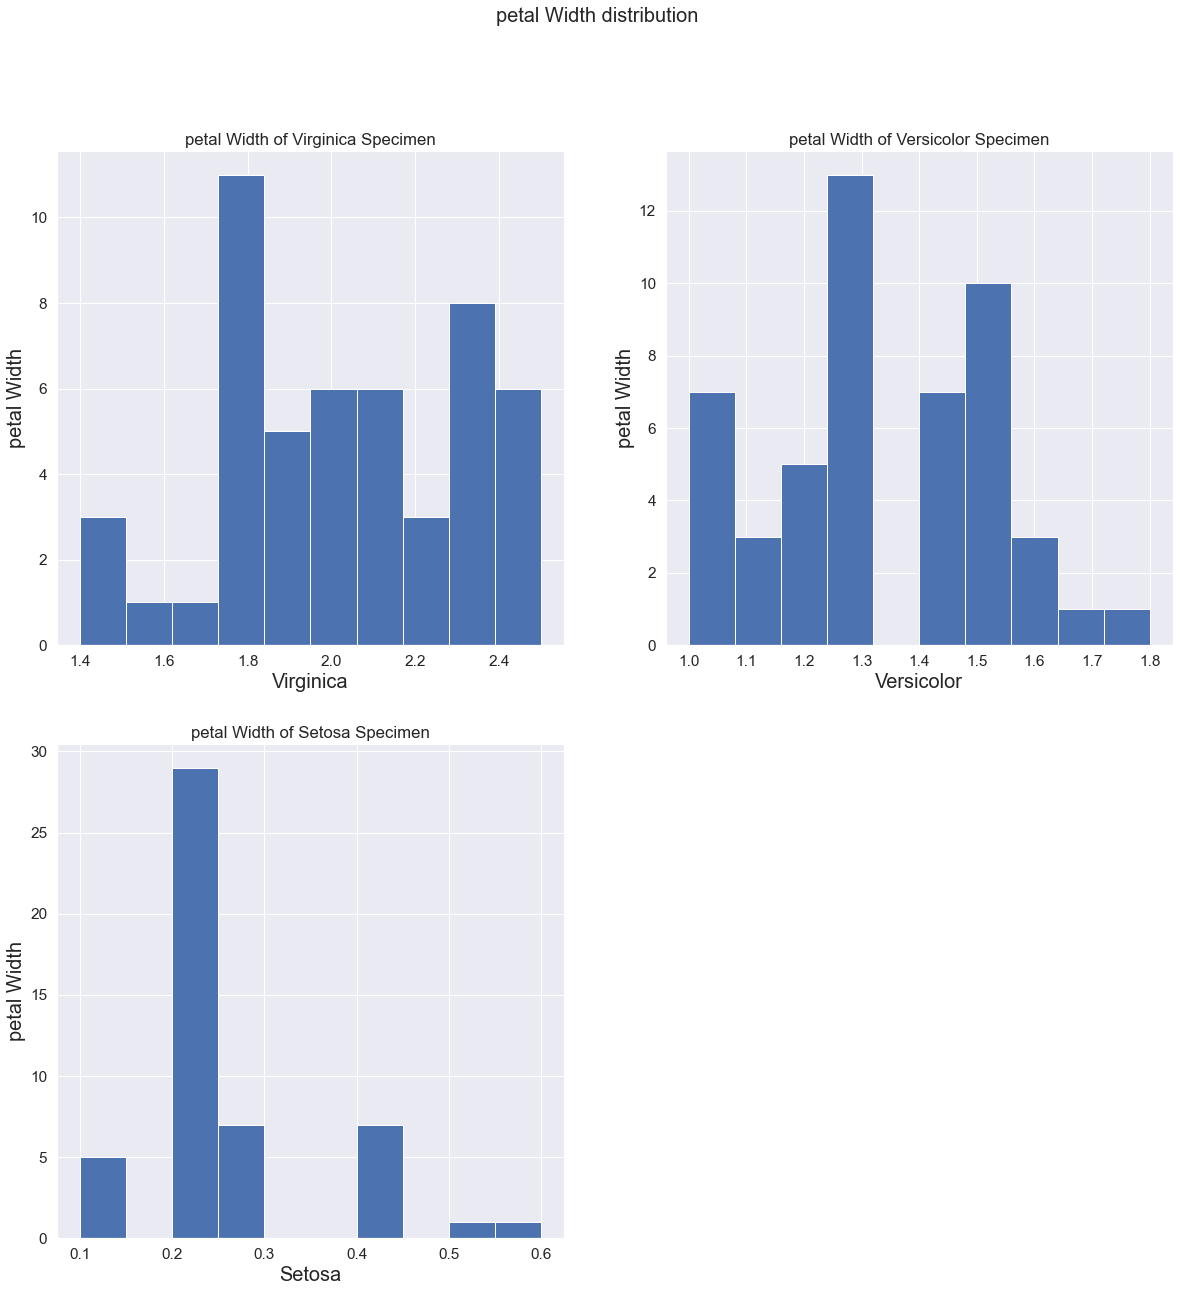

In [297]:
petwidth_plot = plt.figure(figsize=(20,20))
#Posición de Gráficos
petwidth_plot.suptitle("petal Width distribution", fontsize=20)
ax1 = petwidth_plot.add_subplot(221)
ax2 = petwidth_plot.add_subplot(222)
ax3 = petwidth_plot.add_subplot(223)
#Titulos de Ejes
ax1.set_xlabel('Virginica', fontsize=20)
ax1.set_ylabel('petal Width', fontsize=20)
ax2.set_xlabel('Versicolor', fontsize=20)
ax2.set_ylabel('petal Width', fontsize=20)
ax3.set_xlabel('Setosa', fontsize=20)
ax3.set_ylabel('petal Width', fontsize=20)
#Titulos de gráficos
ax1.title.set_text('petal Width of Virginica Specimen')
ax2.title.set_text('petal Width of Versicolor Specimen')
ax3.title.set_text('petal Width of Setosa Specimen')
ax1.hist(iris[iris['variety']=='Virginica']['petal.width'].values)
ax2.hist(iris[iris['variety']=='Versicolor']['petal.width'].values)
ax3.hist(iris[iris['variety']=='Setosa']['petal.width'].values)




(array([ 1.,  1.,  2.,  7., 13., 13.,  7.,  4.,  0.,  2.]),
 array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ]),
 <BarContainer object of 10 artists>)

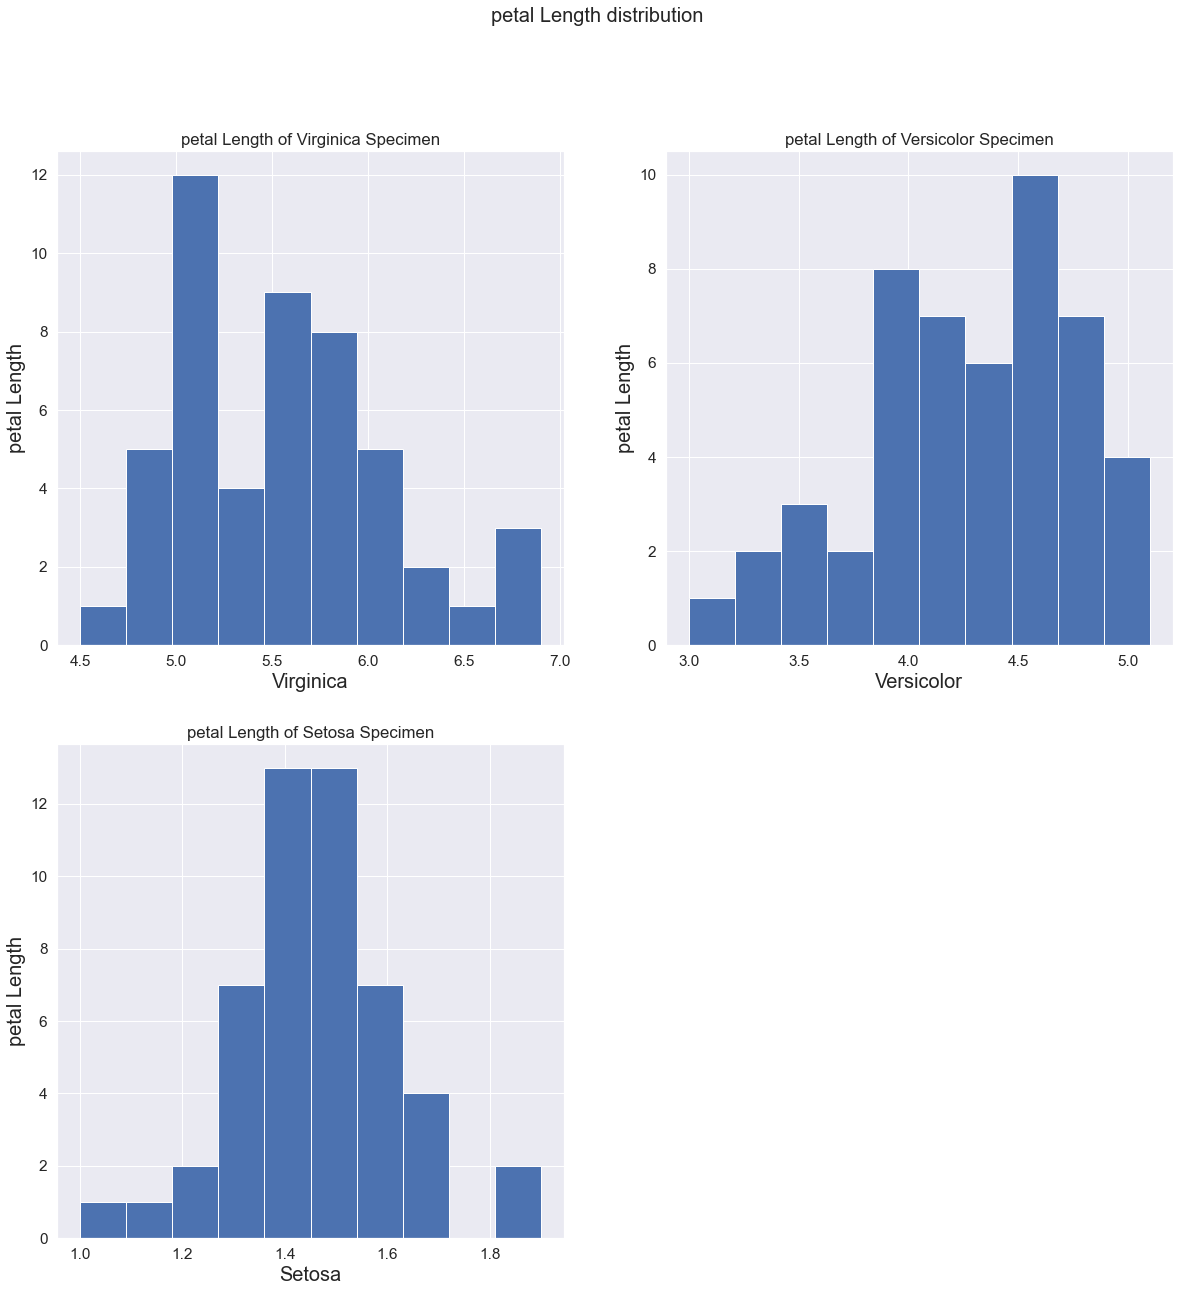

In [298]:
petlength_plot = plt.figure(figsize=(20,20))
#Posición de Gráficos
petlength_plot.suptitle("petal Length distribution", fontsize=20)
ax1 = petlength_plot.add_subplot(221)
ax2 = petlength_plot.add_subplot(222)
ax3 = petlength_plot.add_subplot(223)
#Titulos de Ejes
ax1.set_xlabel('Virginica', fontsize=20)
ax1.set_ylabel('petal Length', fontsize=20)
ax2.set_xlabel('Versicolor', fontsize=20)
ax2.set_ylabel('petal Length', fontsize=20)
ax3.set_xlabel('Setosa', fontsize=20)
ax3.set_ylabel('petal Length', fontsize=20)
#Titulos de gráficos
ax1.title.set_text('petal Length of Virginica Specimen')
ax2.title.set_text('petal Length of Versicolor Specimen')
ax3.title.set_text('petal Length of Setosa Specimen')
ax1.hist(iris[iris['variety']=='Virginica']['petal.length'].values)
ax2.hist(iris[iris['variety']=='Versicolor']['petal.length'].values)
ax3.hist(iris[iris['variety']=='Setosa']['petal.length'].values)


In [299]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


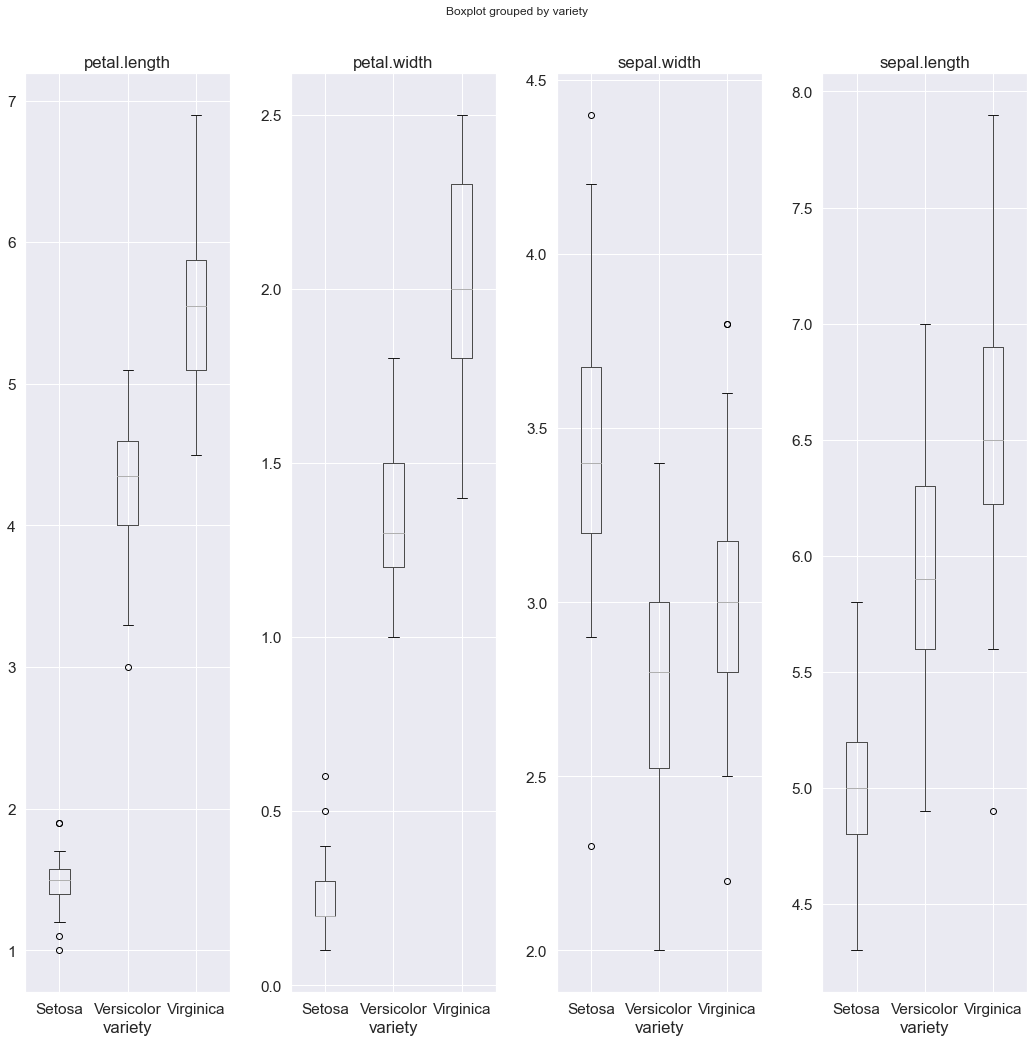

In [300]:
fig, ax = plt.subplots(1, 4, figsize=(15, 15))
iris.boxplot('petal.length','variety', ax=ax[0])
iris.boxplot('petal.width','variety', ax=ax[1])
iris.boxplot('sepal.width','variety', ax=ax[2])
iris.boxplot('sepal.length','variety', ax=ax[3])
fig.tight_layout(pad=3.0);



<AxesSubplot:>

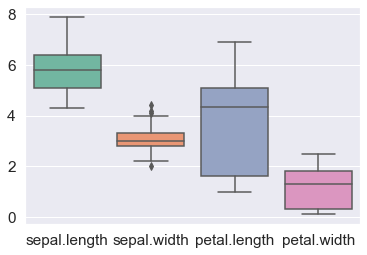

In [301]:
sns.boxplot(data=iris, orient="v", palette="Set2")

In [302]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [303]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(iris, test_size = 0.4, stratify = iris['variety'],random_state = 42)

In [304]:
Error= []
X_train = train[['sepal.length','sepal.width','petal.length','petal.width']]
y_train = train.variety
X_test = test[['sepal.length','sepal.width','petal.length','petal.width']]
y_test = test.variety
classes = ['setosa', 'versicolor', 'virginica']


In [305]:
X_train.columns.tolist()

['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

## Using Decision Tree Classifier

In [306]:
DTree_Classifier = DecisionTreeClassifier(max_depth = 3, random_state = 1)
DTree_Classifier.fit(X_train,y_train)
prediction=DTree_Classifier.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.5f}".format(metrics.accuracy_score(prediction,y_test)))
print('The F1-Score of the Decision Tree is',"{:.5f}".format(metrics.f1_score(y_test,prediction,average='weighted')))


The accuracy of the Decision Tree is 0.98333
The F1-Score of the Decision Tree is 0.98332


In [307]:
Error.append(['Decision Tree',metrics.f1_score(y_test,prediction,average='weighted'),metrics.accuracy_score(prediction,y_test)])

Let's check which variables are the most important according to Decision Tree Classifier

In [308]:
Dtree_Weights = dict(zip(X_train.columns.tolist(),DTree_Classifier.feature_importances_))
Dtree_Weights = pd.DataFrame.from_dict(Dtree_Weights,orient='index')
Dtree_Weights.columns = ['Weights']
Dtree_Weights

,Weights
sepal.length,0.000000
sepal.width,0.000000
petal.length,0.424309
petal.width,0.575691


[Text(209.25, 380.52, 'petal.width <= 0.7\ngini = 0.667\nsamples = 90\nvalue = [30, 30, 30]\nclass = setosa'),
 Text(139.5, 271.8, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]\nclass = setosa'),
 Text(279.0, 271.8, 'petal.length <= 4.95\ngini = 0.5\nsamples = 60\nvalue = [0, 30, 30]\nclass = versicolor'),
 Text(139.5, 163.07999999999998, 'petal.width <= 1.65\ngini = 0.121\nsamples = 31\nvalue = [0, 29, 2]\nclass = versicolor'),
 Text(69.75, 54.360000000000014, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]\nclass = versicolor'),
 Text(209.25, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(418.5, 163.07999999999998, 'petal.width <= 1.7\ngini = 0.067\nsamples = 29\nvalue = [0, 1, 28]\nclass = virginica'),
 Text(348.75, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(488.25, 54.360000000000014, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 26]\nclass = virginica')]

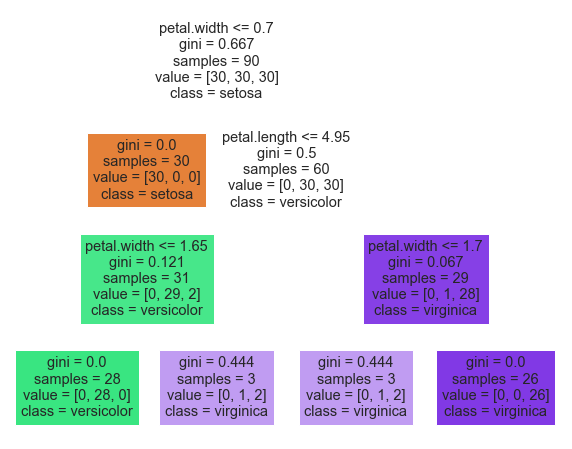

In [309]:
plt.figure(figsize = (10,8))
plot_tree(DTree_Classifier, feature_names = X_train.columns.tolist(), class_names = classes, filled = True)

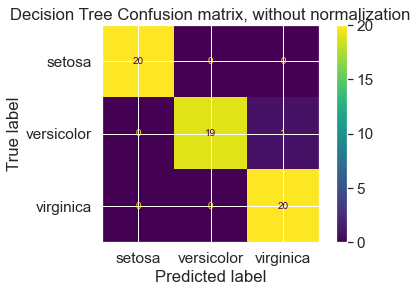

In [310]:
disp = metrics.plot_confusion_matrix(DTree_Classifier, X_test, y_test,
                                 display_labels=classes,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');


This model fits pretty well with an accuracy of 96%. Furthermore, it can be seen that the model works perfectly for the setosa variety, this result confirms the statement that the setosa could be differentiated easily among the other variables. It must be highlighted that the sepal's width and the sepal's length were the variables that had no influence in the model, that can be explained observing the distributions of these characteristics differentiating the varietys, where they have  similar distributions.

## Using K-Nearest Neighbor
It's necessary to test various numbers of K, in order to know which one is better.

In [311]:
K_search_acc = []
K_search_f1score = []
K_search = []
for i in range (1,25):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    prediction=neigh.predict(X_test)
    K_search.append(i)
    K_search_acc.append(metrics.accuracy_score(prediction,y_test))
    K_search_f1score.append(metrics.f1_score(y_test,prediction,average='weighted'))
    

    
print("The most suitable K for the algorithm is ",K_search_acc.index(max(K_search_acc))+1)

The most suitable K for the algorithm is  3


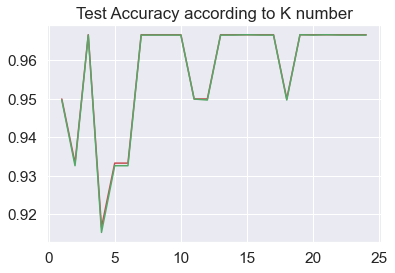

In [312]:
plt.title('Test Accuracy according to K number')
plt.plot(K_search, K_search_acc, 'r') # plotting t, a separately 
plt.plot(K_search, K_search_f1score, 'g') # plotting t, a separately 
plt.show()

In [313]:
neigh = KNeighborsClassifier(n_neighbors=K_search_acc.index(max(K_search_acc))+1)
neigh.fit(X_train, y_train)
prediction=neigh.predict(X_test)

In [314]:
print('The accuracy of the K-nearest neighbor is',"{:.5f}".format(metrics.accuracy_score(prediction,y_test)))
print('The F1-Score of the K-nearest neighbor is',"{:.5f}".format(metrics.f1_score(y_test,prediction,average='weighted')))


The accuracy of the K-nearest neighbor is 0.96667
The F1-Score of the K-nearest neighbor is 0.96658


In [315]:
Error.append(['K-Nearest Neighbor',metrics.f1_score(y_test,prediction,average='weighted'),metrics.accuracy_score(prediction,y_test)])

In [316]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [317]:
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [318]:
x = iris.drop('variety',axis =1)
x

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [319]:
y = pd.get_dummies(iris.variety)
y

,Setosa,Versicolor,Virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [320]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


## Normalize the features

In [321]:
# crea el objeto StandardScaler
scaler = StandardScaler()

# Ajusta los parámetros del scaler
scaler.fit(iris.drop('variety',axis=1))
print (scaler.mean_)

# escala training y test
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)



[5.84333333 3.05733333 3.758      1.19933333]


In [322]:
x_train.shape, y_train.shape

((120, 4), (120, 3))

In [323]:
x_train[:3]

array([[-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [ 0.67450115, -0.59237301,  1.0469454 ,  1.18556721],
       [ 0.55333328,  0.55861082,  0.53540856,  0.52740629]])

## Creando el modelo

In [324]:
inputs = Input(shape=(x_train.shape[1],),name='capa_entrada')
x = Activation('relu')(inputs)
x = Dense(10, activation='sigmoid',name='primera_capa_oculta')(x)
x = Dense(10, activation='sigmoid',name='segunda_capa_oculta')(x)
outputs = Dense(3, activation='softmax', name='capa_salida')(x)
model = Model(inputs=inputs, outputs=outputs)


Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa_entrada (InputLayer)    [(None, 4)]               0         
_________________________________________________________________
activation_11 (Activation)   (None, 4)                 0         
_________________________________________________________________
primera_capa_oculta (Dense)  (None, 10)                50        
_________________________________________________________________
segunda_capa_oculta (Dense)  (None, 10)                110       
_________________________________________________________________
capa_salida (Dense)          (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


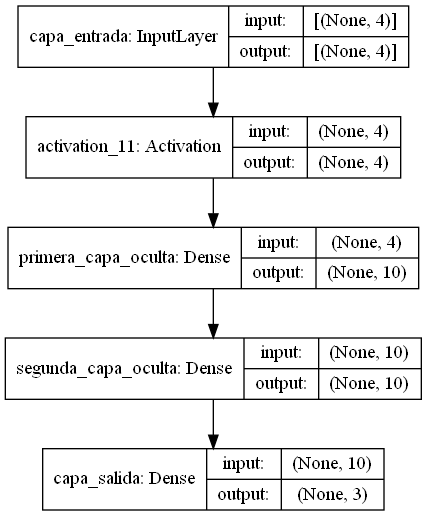

In [325]:
model.summary()
plot_model(model,show_shapes=True)

In [326]:
# métricas
#Como las clases están balanceadas, entonces se puede usar el accuracy. Sin embargo, se usará también 
model.compile(optimizer=Adam(1e-2), loss="categorical_crossentropy", metrics='accuracy')

In [327]:
history = model.fit(
    x_train,
    y_train,
    epochs=200,
    verbose=1,
)

Epoch 1/200
4/4 [==============================] - 0s 1ms/step - loss: 1.2734 - accuracy: 0.2869
Epoch 2/200
4/4 [==============================] - 0s 997us/step - loss: 1.1293 - accuracy: 0.3035
Epoch 3/200
4/4 [==============================] - 0s 997us/step - loss: 1.0781 - accuracy: 0.4746
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 1.0675 - accuracy: 0.3702
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 1.0570 - accuracy: 0.3785
Epoch 6/200
4/4 [==============================] - 0s 1ms/step - loss: 1.0556 - accuracy: 0.3275
Epoch 7/200
4/4 [==============================] - 0s 995us/step - loss: 1.0263 - accuracy: 0.4233
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 1.0014 - accuracy: 0.5919
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 0.9827 - accuracy: 0.8208
Epoch 10/200
4/4 [==============================] - 0s 998us/step - loss: 0.9626 - accuracy: 0.8281
Epoch 11/200
4/4 [===

In [328]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, '-.')
    plt.title('Entrenamiento  '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric])
    plt.show()

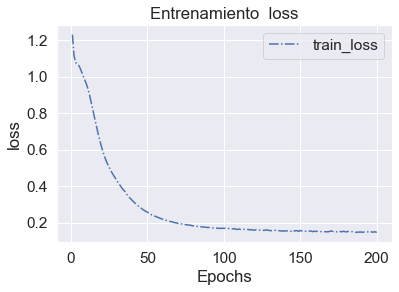

In [329]:
plot_metric(history, 'loss')

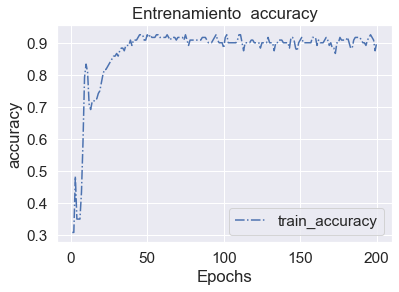

In [330]:
plot_metric(history, 'accuracy')

In [331]:
results = model.evaluate(x_test, y_test)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

1/1 [==============================] - 0s 95ms/step - loss: 0.0895 - accuracy: 0.9333
Final test set loss: 0.089488
Final test set accuracy: 0.933333


In [332]:
y_pred = model.predict(x_test)

<AxesSubplot:>

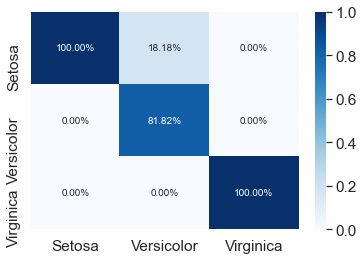

In [333]:
matrix = metrics.confusion_matrix(y_test.values.argmax(axis=1),y_pred.argmax(axis=1))

df_cm = pd.DataFrame(matrix,['Setosa','Versicolor','Virginica'],['Setosa','Versicolor','Virginica'])
                                  
sns.heatmap(df_cm/np.sum(df_cm), annot=True, 
            fmt='.2%', cmap='Blues')


In [334]:
matrix

array([[ 6,  2,  0],
       [ 0,  9,  0],
       [ 0,  0, 13]], dtype=int64)

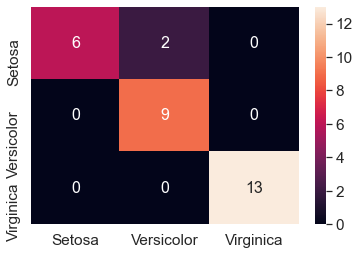

In [335]:
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()